In [149]:
import numpy as np
import pandas as pd
import pickle as pkl
import scanpy as sc
import torch 
import seaborn as sns
import matplotlib.pyplot as plt

In [150]:
def plot_umap_by_X_value(adata, column, selected):
    condition = (adata.obs[column] == selected)
    adata.obs['gene_selection'] = 'others'  # Set default color to gray
    adata.obs.loc[condition, 'gene_selection'] = selected
    # Define a custom color map
    sc.pl.pca(adata, color=['gene_selection'], groups=selected, show=False, alpha=0.8)  # Adjust the palette as needed
    plt.show()

In [151]:
metadata_cpg0000 = pd.read_csv("/lustre/groups/ml01/datasets/projects/cpg0000_alessandro/metadata/metadata_large.csv",
                              index_col=0)
metadata_cpg0000_trt = metadata_cpg0000.loc[metadata_cpg0000.STATE=="trt"]

In [152]:
metadata_cpg0000_cpd = metadata_cpg0000_trt.drop_duplicates(subset="CPD_NAME", keep="last").sort_values(by="CPD_NAME")

Collect embeddings

In [153]:
ebeddings_path = "/home/icb/alessandro.palma/environment/IMPA/IMPA/project_folder/experiments/20231221_a58c2563-a547-4faa-aa80-b9b6ed2f3ed5_cpg0000_total_large_deterministic/checkpoint/000019_embeddings.ckpt"

In [154]:
embeddings = torch.load(ebeddings_path)["embedding_matrix"]["weight"]

In [155]:
adata = sc.AnnData(X=embeddings.cpu().numpy(), 
                  obs=metadata_cpg0000_cpd)

/home/icb/alessandro.palma/miniconda3/envs/IMPA_try/lib/python3.9/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [156]:
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

Check specific genes

/home/icb/alessandro.palma/miniconda3/envs/IMPA_try/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/alessandro.palma/miniconda3/envs/IMPA_try/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


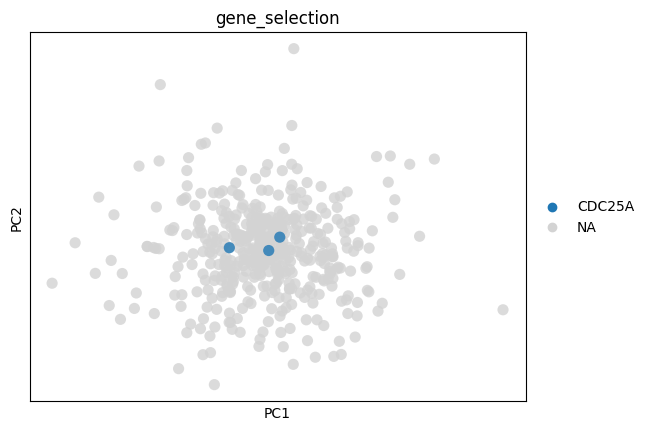

In [158]:
plot_umap_by_X_value(adata, "GENE", "CDC25A")

/home/icb/alessandro.palma/miniconda3/envs/IMPA_try/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/alessandro.palma/miniconda3/envs/IMPA_try/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


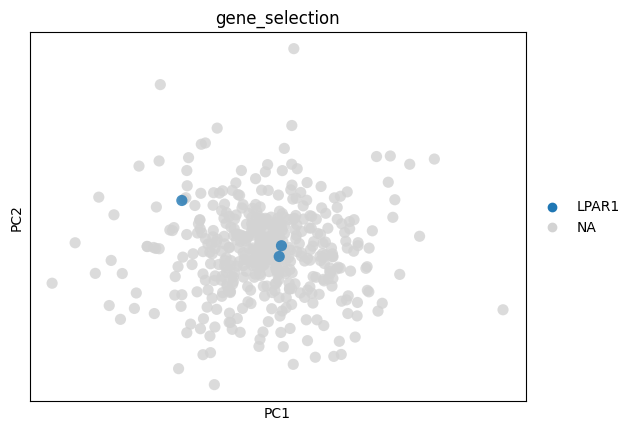

In [159]:
plot_umap_by_X_value(adata, "GENE", "LPAR1")

/home/icb/alessandro.palma/miniconda3/envs/IMPA_try/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/alessandro.palma/miniconda3/envs/IMPA_try/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


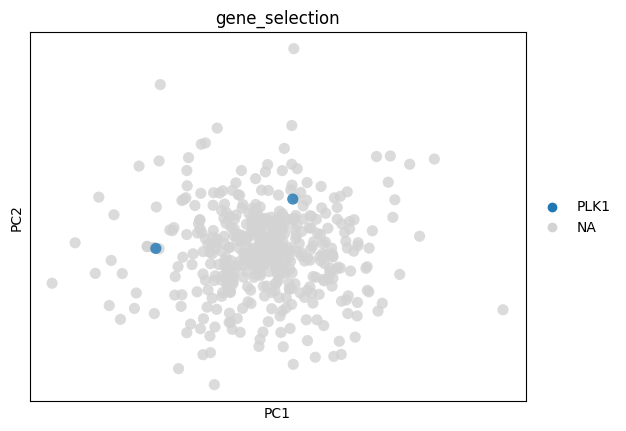

In [160]:
plot_umap_by_X_value(adata, "GENE", "PLK1")

/home/icb/alessandro.palma/miniconda3/envs/IMPA_try/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/alessandro.palma/miniconda3/envs/IMPA_try/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


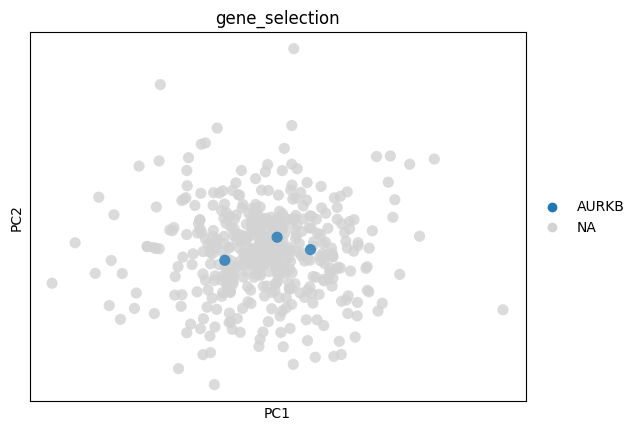

In [161]:
plot_umap_by_X_value(adata, "GENE", "AURKB")